In [1]:
import json
import csv
import os

## Writing to huggingface compatibale format

In [ ]:

json_folder = 'labels'
csv_file = 'output.csv'

json_files = [f for f in os.listdir(json_folder) if f.endswith('.json')]

with open(csv_file, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)

    csv_writer.writerow(['filename', 'json_string'])

    for json_file in json_files:
        file_path = os.path.join(json_folder, json_file)

        with open(file_path, 'r') as f:
            json_data = json.load(f)
            json_string = json.dumps

            csv_writer.writerow([json_file, json_string])

In [1]:
from datasets import load_dataset

In [4]:
dataset = load_dataset('imagefolder', data_dir='diagram2graph')

Resolving data files:   0%|          | 0/220 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [8]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', ' text'],
        num_rows: 219
    })
})

In [6]:
dataset['train'][0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=487x627>,
 ' text': '{"nodes": [{"id": "1", "type_of_node": "start", "shape": "start_event", "label": "Start"}, {"id": "2", "type_of_node": "process", "shape": "task", "label": "Check needs for project"}, {"id": "3", "type_of_node": "decision", "shape": "gateway", "label": "Is project well-defined?"}, {"id": "4", "type_of_node": "process", "shape": "task", "label": "Re-evaluate needs"}, {"id": "5", "type_of_node": "process", "shape": "task", "label": "Build prototype"}, {"id": "6", "type_of_node": "terminator", "shape": "end_event", "label": "END"}], "edges": [{"source": "1", "source_type": "start", "source_label": "Start", "target": "2", "target_type": "process", "target_label": "Check needs for project", "type_of_edge": "solid", "relationship_value": "", "relationship_type": "follows"}, {"source": "2", "source_type": "process", "source_label": "Check needs for project", "target": "3", "target_type": "decision", "target_l

In [13]:
split_dataset = dataset['train'].train_test_split(test_size=0.09, seed=42)

In [14]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['image', ' text'],
        num_rows: 199
    })
    test: Dataset({
        features: ['image', ' text'],
        num_rows: 20
    })
})

In [17]:
split_dataset.push_to_hub("mohammedsafvan/diagramJSON", private=True)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/199 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/mohammedsafvan/diagramJSON/commit/5e9b5cc372f3509973a432b9ce49c9a82aa70d86', commit_message='Upload dataset', commit_description='', oid='5e9b5cc372f3509973a432b9ce49c9a82aa70d86', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/mohammedsafvan/diagramJSON', endpoint='https://huggingface.co', repo_type='dataset', repo_id='mohammedsafvan/diagramJSON'), pr_revision=None, pr_num=None)

In [32]:
dd = load_dataset('mohammedsafvan/diagramJSON')

README.md:   0%|          | 0.00/412 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/11.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.20M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/199 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/20 [00:00<?, ? examples/s]

In [33]:
dd

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 199
    })
    test: Dataset({
        features: ['image', 'text'],
        num_rows: 20
    })
})

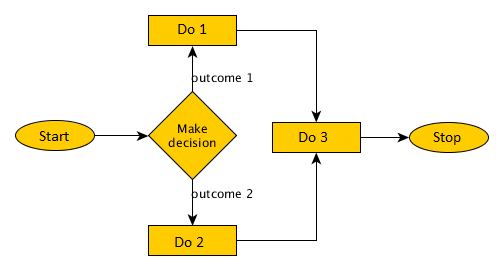

In [34]:
from PIL import Image
dd['train'][0]['image']


In [37]:
import json
json.loads(dd['train'][0]['text'])

{'nodes': [{'id': '1',
   'type_of_node': 'start',
   'shape': 'start_event',
   'label': 'Start'},
  {'id': '2',
   'type_of_node': 'decision',
   'shape': 'gateway',
   'label': 'Make decision'},
  {'id': '3', 'type_of_node': 'process', 'shape': 'task', 'label': 'Do 1'},
  {'id': '4', 'type_of_node': 'process', 'shape': 'task', 'label': 'Do 2'},
  {'id': '5', 'type_of_node': 'process', 'shape': 'task', 'label': 'Do 3'},
  {'id': '6',
   'type_of_node': 'terminator',
   'shape': 'end_event',
   'label': 'Stop'}],
 'edges': [{'source': '1',
   'source_type': 'start',
   'source_label': 'Start',
   'target': '2',
   'target_type': 'decision',
   'target_label': 'Make decision',
   'type_of_edge': 'solid',
   'relationship_value': '',
   'relationship_type': 'follows'},
  {'source': '2',
   'source_type': 'decision',
   'source_label': 'Make decision',
   'target': '3',
   'target_type': 'process',
   'target_label': 'Do 1',
   'type_of_edge': 'solid',
   'relationship_value': 'outcome 1

In [30]:
dd

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 199
    })
    test: Dataset({
        features: ['image', 'text'],
        num_rows: 20
    })
})

In [31]:
dd.push_to_hub("mohammedsafvan/diagramJSON", private=True)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/199 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/20 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/mohammedsafvan/diagramJSON/commit/058e32f0de354613ae72392111470c2a73cc4978', commit_message='Upload dataset', commit_description='', oid='058e32f0de354613ae72392111470c2a73cc4978', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/mohammedsafvan/diagramJSON', endpoint='https://huggingface.co', repo_type='dataset', repo_id='mohammedsafvan/diagramJSON'), pr_revision=None, pr_num=None)